### 연속형 확률변수

- 취할 수 있느 값이 연속인 확률변수로 셀 수 없다.

- 확률변수의 각 값이 나올 수 있는 화귤ㄹ은 0이고 각 값들이 어떤 범위 안에 속할 확률로서 확률값이 정의된다.

<br>

## 1차원 연속형 확률변수 정의

### 확률밀도함수(PDF)

- 연속형 확률변수의 확률 정의에 사용되는 함수

- [a,b]: 확률변수가 취할 수 있는 값의 표현

- f(x):확률밀도함수

   - 연속형 확률변수는 f(x) = P(X=x)이렇게 표현되지 않음

   - 밀도함수에 의한 확률은 확률변수 X가 x0<= X<=x1의 구간에 들어갈 확률로 P(x0<=X<=x1)로 정의된다.

<br>

### 연속형 확률변수 확률의 성질

- f(x) >= 0

- f(x)무한대로 적분 =1

<br>

### 누적분포함수(CDF)

- 확률변수 X가 x이하가 될 때의 확률

-  F(x): 누적분포함수

<br>

### 1차원 연속형 확률변수의 지표

- 기대값

- 분산



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

from scipy import integrate
import warnings

warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

In [3]:
#연속형 확률변수 예시

# f(x) = 2x {0<=x<=1}
# f(x) = 0 (otherwise)

x_range = np.array([0,1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

X = [x_range, f]

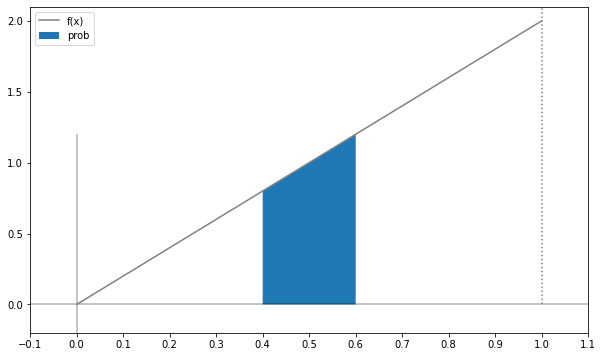

In [4]:
#연속형 확률변수 시각화 (0.4 <=x <=0.6)

xs = np.linspace(x_range[0], x_range[1],100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color ='gray')
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles = ':', color='gray')

#0.4 ~0.6까지 x좌표
xs = np.linspace(0.4,0.6,100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2,1.3,0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()

plt.show()

In [5]:
#영역 면적 계산

integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [6]:
#연속형 확률변수 확률의 성질 확인 방법

#scipy.optimizer의 minimize_scalar 함수(함수의 최소값을 구하는 함수)

#f(x)의 최소값이 0이상으로 나오면 항상 0이상의 값을 취하는지 확인이 가능하다.

from scipy.optimize import minimize_scalar

ron = minimize_scalar(f)

ron.fun

0

In [7]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [8]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [9]:
F(0.6) - F(0.4)

0.200

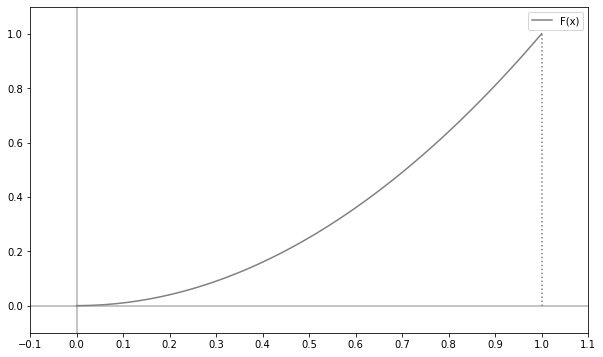

In [10]:
#누적분포함수 시각화
#누적분포함수는 반드시 단조증가함수의 특성을 가진다.

xs = np.linspace(x_range[0], x_range[1],100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label = 'F(x)', color = 'gray')
ax.hlines(0,-0.1,1.1, alpha=0.3)
ax.vlines(0,-0.1,1.1, alpha=0.3)
ax.vlines(xs.max(), 0,1, linestyles = ':', color = 'gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

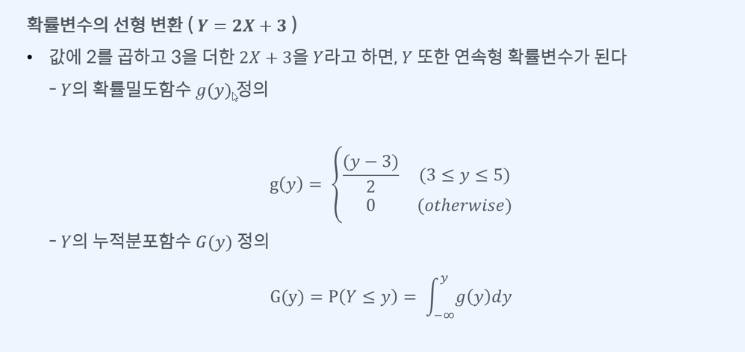

In [11]:
#확률변수 Y=2X + 3정의 및 시각화
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]
 

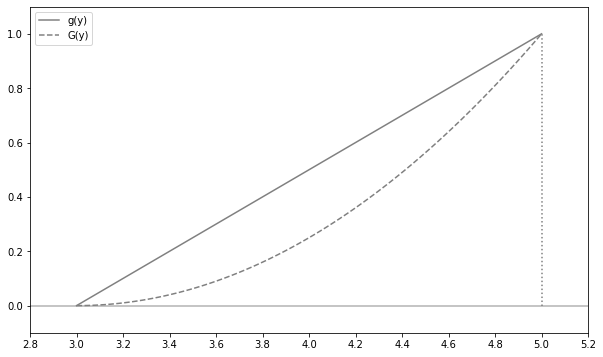

In [12]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [13]:
#1차원 연속형확률변수의 지표, 기대값

def integrand(x):
    return x*f(x)
integrate.quad(integrand, -np.inf, np.inf)[0]



0.667

In [14]:
#확률변수 X와 y=2X+3의 기대값 계산함수 정의

def E(X, g=lambda x:x):
    x_range, f =X
    def integrand(x):
        return x*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]


In [15]:
E(X)

0.667

In [17]:
2*E(X) +3

4.333

In [20]:
#분산

mean = E(X)
def integrand(x):
    return (x-mean) **2 * f(x)
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [21]:
#변환된 확률변수 Y=2X+3의 분산 정의

def V(X, g=lambda x:x):
    x_range, f =X
    mean = E(X,g)

    def integrand(x):
        return (x-mean) **2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [22]:
V(X)

0.056

In [23]:
2**2 *V(X)

0.222